# IMAGE PROCESSING

In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
from os import path
import bm3d
from skimage import io, img_as_float
from layeris.layer_image import LayerImage
%matplotlib inline

# Contoh Kasus 
## Proses Penghilangan Noise Dari Bunga


Sebelum Denoising
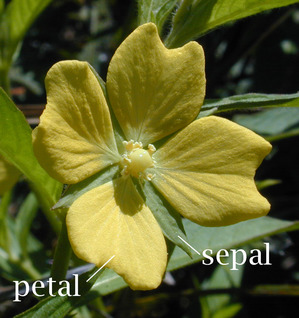

#### LOAD DATASET

In [2]:
root_path_testing = 'Data/*.jpg' ## di path mana gambar akan di blend
root_path_saving = 'After/'  ## dimana gambar akan disave
file_path = glob.glob(root_path_testing)

#### Fixed Thresholding

In [3]:
for path in file_path:
    img=cv2.imread(path)
    img_th2, img_th1= cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    filename = path.split('\\')[-1]
    cv2.imwrite(root_path_saving + filename,img_th1)

Hasil Fixed Thresholding
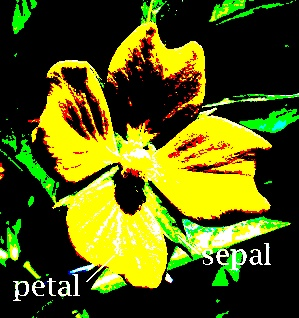

#### Denoising filter 2D

In [4]:
for path in file_path:
    img=cv2.imread(path)
    kernel = np.ones((3,3),np.float32)/9
    filt_2D = cv2.filter2D(img, - 1,kernel)

    filename = path.split('\\')[-1]
    cv2.imwrite(root_path_saving + filename,filt_2D)

Hasil Denoising Filter 2D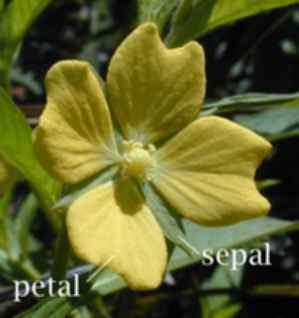

#### Denoising Blur

In [5]:
for path in file_path:
    img=cv2.imread(path)
    kernel = np.ones((3,3),np.float32)/9
    blur = cv2.blur(img,(3,3))
    # split filename
    filename = path.split('\\')[-1]
    cv2.imwrite(root_path_saving + filename,blur)

Hasil Denoising Blur
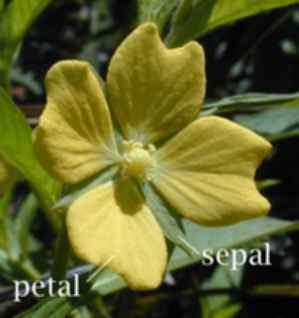

#### CLAHE

In [6]:
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
for path in file_path:
    image = cv2.imread(path, 0)
    image_equ = clahe.apply(image)
    
    # split filename
    filename = path.split('\\')[-1]
    cv2.imwrite(root_path_saving + filename, image_equ)

Hasil CLAHE
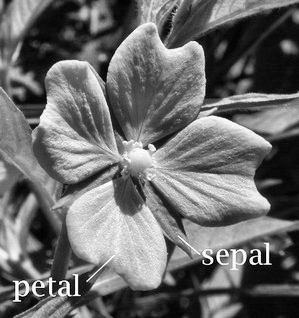

#### Histogram Equalization

In [7]:
for path in file_path:
    img = cv2.imread(path,0) ## grayscale 
    equ = cv2.equalizeHist(img)
    
    ##save
    filename = path.split("\\")[-1]
    cv2.imwrite(root_path_saving + filename ,equ)

Hasil Histogram Equalization
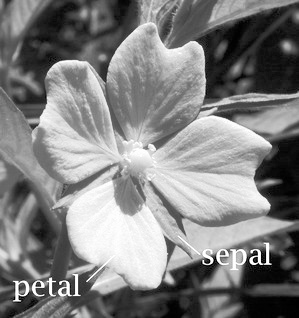

#### Block & Matching 3D

In [8]:
for path in file_path:
    img = img_as_float(io.imread(path,as_gray= True))
    BM3D_denoised_image = bm3d.bm3d(img, sigma_psd=127/255, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
    #BM3D_denoised_image = bm3d.bm3d(img, sigma_psd=.2, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
    filename = path.split('\\')[-1]
    plt.imsave(root_path_saving + filename,BM3D_denoised_image,cmap='gray')

Hasil BM3D
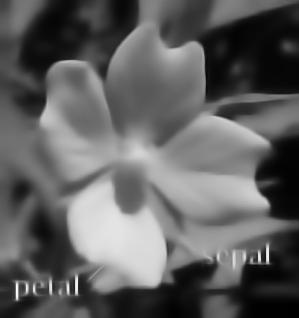

### Segmentasi

In [9]:
for path1 in file_path:    
    image_gambar = cv2.imread(path1)
    gray = cv2.cvtColor(image_gambar, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    ret, result = cv2.connectedComponents(thresh)
    idx = 0
   
    background = np.zeros(thresh.shape, np.uint8)
    for res in np.unique(result):
        if res == 0:
            continue
    
        temp_obj = np.zeros(thresh.shape, np.uint8)
        temp_obj[result ==res] = 255

        background = cv2.add(background, temp_obj)

    image,contours, hierarchy = cv2.findContours(background, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    for idx_contuor in contours:
        x, y, w, h, = cv2.boundingRect(idx_contuor)
        start = (x, y)
        end = (x + w, y + h)
    #     imgg = cv2.rectangle(img_th2, start, end, (255,0,0), 2)
        imgg = cv2.rectangle(thresh, start, end, (255,0,0), 2)
    filename = path1.split('\\')[-1]
    cv2.imwrite('Segmentasi'+ filename, imgg)

Hasil Segmentasi
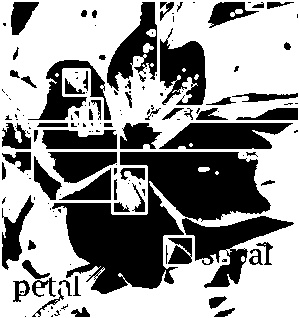

#### Split Data

In [10]:
from sklearn.model_selection import train_test_split
import glob
import numpy as np
import os
import shutil

data_type = "sebelum split"
idx = 0



root_folder_image = "image/*.jpg".format(data_type, idx)
root_folder_label = "label/*.jpg".format(data_type,idx)

image = glob.glob(root_folder_image)
label = glob.glob(root_folder_label)

image = np.array(image)
label = np.array(label)

index_image = np.arange(len(image))
index_label = np.arange(len(label))

idx_image_train , idx_image_test, _ , _ = train_test_split(index_image, index_image, test_size  = 0.2, random_state = 32)

image_train = image[idx_image_train]
image_test = image[idx_image_test]




filenames =glob.glob("label/*.jpg")

## root path yang digunakan
root_path_saving_train_image = 'train split/image'  ## dimana gambar akan disave
root_path_saving_test_image = 'test split/image'  ## dimana gambar akan disave
root_path_saving_train_label = 'train split/label'  ## dimana gambar akan disave
root_path_saving_test_label = 'test split/label'  ## dimana gambar akan disave

#make new directory
os.makedirs(root_path_saving_train_image, exist_ok = True)
os.makedirs(root_path_saving_test_image, exist_ok = True)
os.makedirs(root_path_saving_train_label, exist_ok = True)
os.makedirs(root_path_saving_test_label, exist_ok = True)


## split data train image

for idx, path in enumerate(image_train):
    filename = path.split('\\')[-1]
    shutil.copy2(path,root_path_saving_train_image.format(filename))

 
path_test = "label/"
for i in range (len(image)):
    for j in range(len(image_train)):
        if(image[i]==image_train[j]):
            filename_train = image[i].split('\\')[-1]
            shutil.copy2(path_test+filename_train,root_path_saving_train_label.format(filename_train))
  
    
for idx, path in enumerate(image_test):
    filename = path.split('\\')[-1]
    shutil.copy2(path,root_path_saving_test_image.format(filename))
    
    
path_test = "label/"
for i in range (len(image)):
    for j in range(len(image_test)):
        if(image[i]==image_test[j]):
            filename_train = image[i].split('\\')[-1]
            shutil.copy2(path_test+filename_train,root_path_saving_test_label.format(filename_train))
      
